# Image Filtering Module

**Notes from Hany Farid's Computer Vision Course (UC Berkley)**
https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/

## Convolutions
We begin the lessons on convolutions with a discussion of discrete-time signals and systems as well as an intro to linear time-invariant systems in 1-dimension. 

Two keys to the magic of Linear Time-Invariant systems are:

### 1. Linear property - you can just scale the output instead of the input

The fact that these systems are linear in nature means that it is functionally the same thing to pass our system a scaled value as it is to pass a raw value into the system and then scale the output. 

For example, our Linear Time-Invariant System (LTI) can be written as:

$ g[x] = T\{f[x]\}$

or

$ g[x] = T \bigg\{ 
\sum\limits_{k=-\infty}^\infty f[k]\delta[x-k]
\bigg\} $

So we can see the linear properly at play when, instead of scaling the delta (signal) by $f[k]$ inside the LTI system $T$, we can pull out that scale term and pass only the signal value itself into $T$ and scale the output of our system by $f[k]$.

$ g[x] = 
\sum\limits_{k=-\infty}^\infty f[k]T\{\delta[x-k]\}
$

### 2. Time-invariant property - you can just shift the output instead fo shifting the input

This means that if we define the output of our LTI $T\{\delta[x]\}$ as $h[x]$ then we can just add a shifting term to h instead of passing a shifted value into $T$

$ h[x] = T\{\delta[x]\}$

$ g[x] = 
\sum\limits_{k=-\infty}^\infty f[k]h[x-k]\}
$



Because of the two properties above we can just manipulate the output from one discrete signal (scaling and shifting) instead of needing to pass new inputs into the LTI system and re-compute everything.

> "A single unit-impulse response fully characterizes the linear time-invariant system"

So the above is a convolution but we note it using $\star$ notation like:

$ g[x] = (f \star h)[x]$

or

$ g[x] = f[x] \star h[x] $

And because our LTI system is a linear system of equations, we can solve for this with matrix multiplication like:

$ \begin{pmatrix}
g[0] \\
g[1] \\
g[2] \\
\vdots \\
g[n-1] \\
g[n]
\end{pmatrix} = \begin{pmatrix}
h_0 & h_{-1} & 0 & \dots & 0 & 0 & h_1 \\
h_1 & h_0 & h_{-1} & \dots & 0 & 0 & 0 \\
0 & h_1 & h_0 & \dots & 0 & 0 & 0 \\
\vdots &&& \ddots &&& \vdots \\
0 & 0 & 0 & \dots & h_1 & h_0 & h_{-1} \\
h_{-1} & 0 & 0 & \dots & 0 & h_1 & h_0 
\end{pmatrix}  \begin{pmatrix}
f[0] \\
f[1] \\
f[2] \\
\vdots \\
f[n-1] \\
f[n]
\end{pmatrix}$

or, as:

$ \vec{g} = M \vec{f} $

You'll also note that the second matrix there, $M$, is invertable - so we can also find the input values $f$ from the resulting matrix when we know $M$:

$ \vec{f} = M^{-1} \vec{g} $

*Note: We'll deal with edges of the convolution later on - for now you can see that we're wrapping the `h_x` values in the first and last row*


### 2-D Convolutions 

Moving from 1D to 2D is pretty straightforward - we can take the equations above and, instead of just having to deal with $x$, we will expect $[x,y]$ coordinate pairs instead.

Now instead of having a series of linear points moving down a line, we will have a little matrix (kernel) moving across the face of a larger matrix (pixel values) where the center of the kernel is the single impulse signal

So we can think about a **discrete image** as:

$f[x,y] = 
\sum\limits_{j=1}^m 
\sum\limits_{k=1}^n 
f[j,k]
\delta[x-j, y-k]
$

and the corresponding **convolution** using a LTI system as:

$g[x,y] = 
\sum\limits_{j=1}^m 
\sum\limits_{k=1}^n 
f[j,k]
h[x-j, y-k]
$

where the convolutional output is some shifted and scaled version of a **single unit-impulse response**, as:

$ h[x,y] = T\{\delta[x,y]\} $

### Edge Detection

A powerful use of convolutions is in edge detection, where you can find the vertical and horizontal derivative then combine them to find the "edges" of an image - where there is significant differences in neighboring pixel values

To find the vertical derivative we can use the following matrix as our filter (or, unit-impulse response) and see how it would magnify differences above and below the primary unit signal (center cell):

**Vertical Derivative ($f_y$)**

|   |   |   |
|---|---|---|
|-0.125|-0.250|-0.125|
|0|0|0|
|0.125|0.250|0.125|

Similarly, the following filter will maginfy differences in front of and behind the primary center cell:

**Horizontal Derivative ($f_x$)**

|   |   |   |
|---|---|---|
|-0.125|0|-0.125|
|-0.250|0|-0.250|
|-0.125|0|-0.125|


**Gradient (edges)**

These two filters can be combined to show us the edges of an image (all the places were there is a major change in value from pixel to pixel).

$ \sqrt{f_x^2 + f_y^2} $


### Exercise #6 - Computing Gradients for Edge Detection

> Write some code to compute the image gradient: $ \sqrt{f_x^2 + f_y^2} $

> See `scipy.ndimage.convolve`

We'll use the same Einstein image Hany uses in his example here: https://farid.berkeley.edu/learnComputerVision/lectures/cv-03-05-convolution2D.mp4

(-0.5, 224.5, 223.5, -0.5)

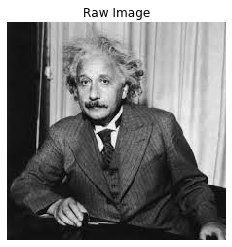

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

img_raw = 1.0 * plt.imread('../images/einstein.jpeg')

# It looks like my grey image includes 3 channels, although each of the values in each channel are identical... 
# I'll try to condense them down to a single channel
img = np.average(img_raw, axis=-1)
plt.imshow(img, cmap='gray')
plt.title('Raw Image')
plt.axis('off')

(-0.5, 224.5, 223.5, -0.5)

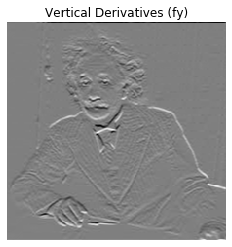

In [62]:
# compute vertical derivitaves and display image
v = np.array([[-0.125,-0.250,-0.125],[0,0,0],[0.125,0.250,0.125]])
vimg = ndimage.convolve(img, v, mode='constant')

plt.imshow(vimg, cmap='gray')
plt.title('Vertical Derivatives (fy)')
plt.axis('off')

(-0.5, 224.5, 223.5, -0.5)

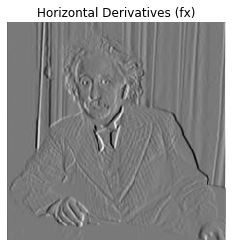

In [63]:
# compute and display horizontal derivatives
h = np.array([[-0.125,0,0.125],[-0.25,0,.25],[-0.125,0,0.125]])
himg = ndimage.convolve(img, h, mode='constant')

plt.imshow(himg, cmap='gray')
plt.title('Horizontal Derivatives (fx)')
plt.axis('off')

(-0.5, 224.5, 223.5, -0.5)

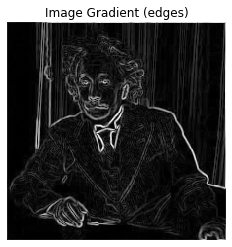

In [64]:
# square and sum the previous two values and display and image of the gradient
g = np.sqrt(vimg**2 + himg**2)

plt.imshow(g, cmap='gray')
plt.title('Image Gradient (edges)')
plt.axis('off')

## [Separable Convolutions](https://farid.berkeley.edu/learnComputerVision/lectures/cv-03-06-separableConvolution.mp4)

Ocassionally you can decompose your 2-D filter matrix into two 1-D filters which will functionally give the same result as we see above - but with sometimes very significant computational savings as the filter size increases. This is possible when your 2-D filter matrix is rank 2.

We can do this decomposion using SVD (Singular Value Decomposition) so that in this equation we used above:

$ g[x,y] = 
\sum\limits_{j=1}^m 
\sum\limits_{k=1}^n 
f[j,k]
h[x-j, y-k]
$

or, more concisely,

$ g[x,y] = f[x,y] \star h[x,y] $

we can decompose our filter, $h[x,y]$ as:

$h[x,y] = h_1[x]h_2[y] $

and then the new convolution can be a combination of those two 1-D vectors:

$g[x,y] = (f[x,y] \star h_1[x]) \star h_2[y] $

### Exercise #7 - Find gradient using separable filters

> Write some code to compute the image gradient using x-y separable filters

> See scipy.scipy.sepfir2

In [84]:
# using the filters v & h and img as defined above
uv, sv, vv = np.linalg.svd(v)
uh, sh, vh = np.linalg.svd(h)

print(f'U of Vertical Filter:\n {uv}\n')
print(f'S of Vertical Filter:\n {sv}\n')
print(f'V of Vertical Filter:\n {vv}\n')

print(f'U of Horizontal Filter:\n {uh}\n')
print(f'S of Horizontal Filter:\n {sh}\n')
print(f'V of Horizontal Filter:\n {vh}\n')

U of Vertical Filter:
 [[-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]
 [ 0.70710678  0.70710678  0.        ]]

S of Vertical Filter:
 [0.4330127 0.        0.       ]

V of Vertical Filter:
 [[ 0.40824829  0.81649658  0.40824829]
 [ 0.         -0.4472136   0.89442719]
 [ 0.91287093 -0.36514837 -0.18257419]]

U of Horizontal Filter:
 [[-0.40824829  0.91287093  0.        ]
 [-0.81649658 -0.36514837 -0.4472136 ]
 [-0.40824829 -0.18257419  0.89442719]]

S of Horizontal Filter:
 [4.33012702e-01 4.38854184e-17 0.00000000e+00]

V of Horizontal Filter:
 [[ 0.70710678  0.         -0.70710678]
 [ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]]



**Note:** because the above two filters have mirror symmetry then we can actually just transpose one filter to find the other... this is seen above where the first column of the $v$ matrix on our vertical filter is equal to -1 x the first row of the $u$ matrix on our horizontal matrix

In [87]:
col_vfilt = uv[:,0] # first col
row_vfilt = vv[0] # first row

col_hfilt = uh[:,0]
row_hfilt = vh[0]

print(f'U of Vertical: {col_vfilt}')
print(f'V of Vertical: {row_vfilt}\n')

print(f'U of Horizontal: {col_hfilt}')
print(f'V of Horizontal: {row_hfilt}')

U of Vertical: [-0.70710678  0.          0.70710678]
V of Vertical: [0.40824829 0.81649658 0.40824829]

U of Horizontal: [-0.40824829 -0.81649658 -0.40824829]
V of Horizontal: [ 0.70710678  0.         -0.70710678]


(-0.5, 224.5, 223.5, -0.5)

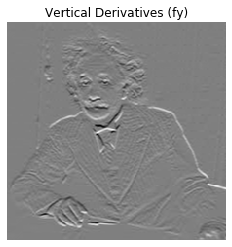

In [88]:
from scipy.signal import sepfir2d

sep_vimg = sepfir2d(img, row_vfilt, col_vfilt)

plt.imshow(sep_vimg, cmap='gray')
plt.title('Vertical Derivatives (fy)')
plt.axis('off')

(-0.5, 224.5, 223.5, -0.5)

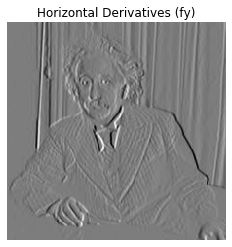

In [89]:
sep_himg = sepfir2d(img, row_hfilt, col_hfilt)

plt.imshow(sep_himg, cmap='gray')
plt.title('Horizontal Derivatives (fy)')
plt.axis('off')

(-0.5, 224.5, 223.5, -0.5)

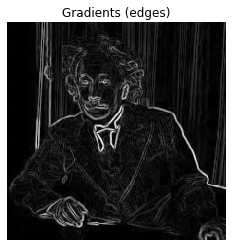

In [92]:
# And now we can compute the gradient using the derivatives found with our separable filters above:
sep_gimg = np.sqrt( sep_vimg**2 + sep_himg**2)

plt.imshow(sep_gimg, cmap='gray')
plt.title('Gradients (edges)')
plt.axis('off')

## Basis and Fourier

### Canonical Basis

We have been talking about vectors assuming a canonical basis - which is to say that if we have a 2 dimensional space we typically assume that our two basis vectors ($\hat i$ and $\hat j$) are 1 along the relevant axis and everything else is 0. 

So, the basis vector $\hat i$ in the x direction is (1,0) and the basis vector $\hat j$ in the y direction is (0,1). See the ["Change of Basis" video from 3Blue1Brown's Essence of Linear Algebra series](https://www.youtube.com/watch?v=P2LTAUO1TdA&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=13) for more intuition on that.

If we have a series of signals $[1,2,3,4,5,6,7]$, we assume that they map to a sum of "scaled and shifted impulses" - these are assumed to be using canonical basis:

```
1(1 0 0 0 0 0 0)
2(0 1 0 0 0 0 0)
3(0 0 1 0 0 0 0)
4(0 0 0 1 0 0 0)
5(0 0 0 0 1 0 0)
6(0 0 0 0 0 1 0)
7(0 0 0 0 0 0 1)
```

So our equation for a discrete signal can then be represented as a sum of some scaled and shifted impulses where $a_k$ is the scalar value we see above (1,2,3...7) and $b_k$ is the degree to which our impulse is shifted (as seen in the vectors above):

$f[x] = \sum\limits_{k=0}^{m-1} a_k b_k(x) $


But how do we find $a_k$? We just need to take the dot product between our input signal and corresponding basis vector:

$ a_k = \sum\limits_{l=0}^{m-1} f(l) b_k(l) $
